In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats


In [2]:
# Create a grid of points
def plot_two_priors(prior_1_name, 
                    prior_2_name, 
                    prior_1_range, 
                    prior_2_range, 
                    prior_distribution_1, 
                    prior_distribution_2, 
                    plot_add_ons = None):
    prior_1_linspace = np.linspace(prior_1_range[0], prior_1_range[1], 100)
    prior_2_linspace = np.linspace(prior_2_range[0], prior_2_range[1], 100)
    prior_1_mesh, prior_2_mesh = np.meshgrid(prior_1_linspace, prior_2_linspace)
    shape = prior_1_mesh.shape

    prior_1_mesh_flattened = prior_1_mesh.flatten()
    prior_2_mesh_flattened = prior_2_mesh.flatten()

    P = []

    for (prior_1_point, prior_2_point) in zip (prior_1_mesh_flattened, prior_2_mesh_flattened):
        P.append(prior_distribution_1(prior_1_point)*prior_distribution_2(prior_2_point))

    P = np.reshape(P,shape)

    # Create a contour plot
    plt.figure(figsize=(8, 8))
    plt.contourf(prior_1_mesh, prior_2_mesh, P, levels=30, cmap='viridis')
    plt.xlabel(prior_1_name)
    plt.ylabel(prior_2_name)
    plt.title('Prior ')

    if plot_add_ons:
        add_on_labels = plot_add_ons['labels']
        add_on_x = plot_add_ons[prior_1_name]
        add_on_y = plot_add_ons[prior_1_name]

        plt.plot(add_on_x,add_on_y,'.r')

        # zip joins x and y coordinates in pairs
        for i, (add_on_x_point,add_on_y_point) in enumerate(zip(add_on_x,add_on_y)):
            label = add_on_labels[i]
            plt.annotate(label, (add_on_x_point,add_on_y_point), textcoords="offset points", 
            xytext=(0,10), ha='center', color = 'r')

    plt.show()

def gamma_setup(mu, sigma):
    alpha =  mu**2/sigma**2
    beta = mu/sigma**2
    return stats.gamma(a = alpha, scale = 1/beta).pdf

def log_norm_setup(mu, sigma):
    alpha = np.log(mu) - 0.5*np.log(1+sigma**2/mu)
    beta = np.sqrt(np.log(1+sigma**2/mu))
    def log_norm(x):
        p = 1/(x*beta*np.sqrt(2*np.pi))*np.exp(-(np.log(x)-alpha)**2/(2*beta**2))
        return p
    return log_norm

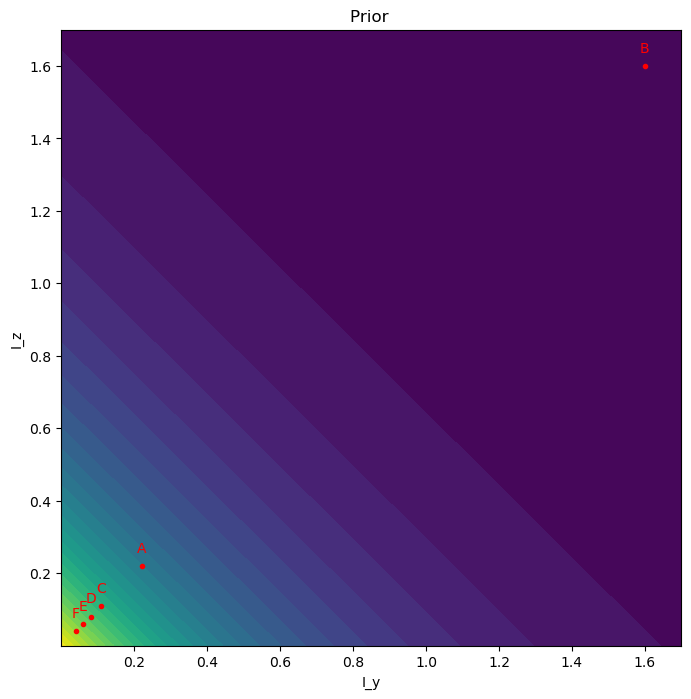

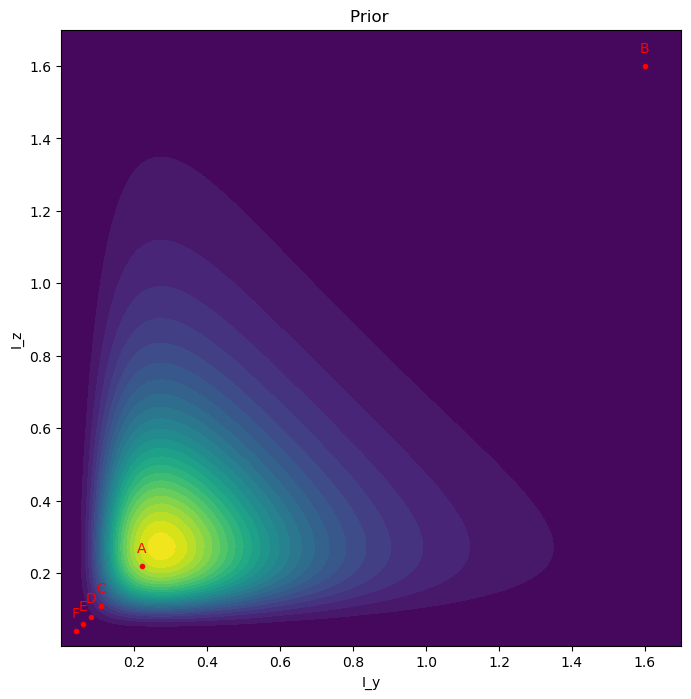

In [8]:
mu_1, sigma_1 = 0.5, 0.5
mu_2, sigma_2 = 0.5, 0.5

plot_add_ons = {
    'I_y': [0.22, 1.6, 0.11, 0.08, 0.06, 0.04],
    'I_z': [0.2, 1.2, 0.08, 0.06, 0.03, 0.016],
    'labels': ['A','B','C','D','E','F']
}

dist_1 = gamma_setup(mu_1, sigma_1)
dist_2 = gamma_setup(mu_2, sigma_2)

plot_two_priors('I_y', 'I_z', [0.0001, 1.7], [0.0001, 1.7], dist_1, dist_2, plot_add_ons)

dist_1 = log_norm_setup(mu_1, sigma_1)
dist_2 = log_norm_setup(mu_2, sigma_2)

plot_two_priors('I_y', 'I_z', [0.0001, 1.7], [0.0001, 1.7], dist_1, dist_2, plot_add_ons)